# U.S. Medical Insurance Costs

Goal: The goal of this project is to optimize the insurance cost and to inspect the role of BMI in insurance cost. This code was developed by a two-member team. Each of us was responsible for one of the specific parts of research, but we supported and helped each other throughout the process. We also held regular Google Meet sessions to discuss our progress and plan the next steps.

Data: For this project we are assuming that insurance is provided by one company. 

Authors: Kaileb O'Neil, Jakub Kohout

## Preparing Data
Firstly we have imported pandas library and insurance.csv

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
starting_df = pd.read_csv("insurance.csv")
#Set pandas to display more columns per line
pd.set_option('display.width',2000)


Now We need to do some basicquality check, if there are any rows with Null or other "bad" values.

In [87]:
def check_for_nulls (df):
    df["nulls"] = df.apply(lambda row: row.isnull().any(), axis=1)
    return df
test_null = check_for_nulls(starting_df)

print(test_null["nulls"].unique())

[False]


In [88]:
starting_df.drop(columns=['nulls'], inplace=True)


## Minimizing My Insurance Cost: 
Info: I am 21 years old male with 0 children
### Main Questions:
 - What is the best region to move to?
 - How many child should I have in the future?
 - Where to move now?
### Approach Breakdown:
 - Identifing columns I can filter
 - In the second step we will see if people in regions have simular bmi and age, because it is known that with higher age comes higher costs (see in Graph 1) and bmi is doing the same and my coworker Kaileb supports that in his part. I will do the same for the number of kids.
- Observe the results and decide if it is valid to have some conclusion or the distribution is too fragmented.
- Do the final calculation
- Do some basic visualization and prepare conclusion supported with arguments






### Creation of filtered_df
In my case I will filter the dataframe, because I am a male who is not smoking and that will never change. columns "sex" and "smoker", because 

In [89]:
filtered_df = starting_df[(starting_df["smoker"]=="no")&(starting_df["sex"]=="male")].reset_index()
print(filtered_df.head(10))

   index  age   sex     bmi  children smoker     region      charges
0      1   18  male  33.770         1     no  southeast   1725.55230
1      2   28  male  33.000         3     no  southeast   4449.46200
2      3   33  male  22.705         0     no  northwest  21984.47061
3      4   32  male  28.880         0     no  northwest   3866.85520
4      8   37  male  29.830         2     no  northeast   6406.41070
5     10   25  male  26.220         0     no  northeast   2721.32080
6     12   23  male  34.400         0     no  southwest   1826.84300
7     15   19  male  24.600         1     no  southwest   1837.23700
8     17   23  male  23.845         0     no  northeast   2395.17155
9     18   56  male  40.300         0     no  southwest  10602.38500


## Graph 1

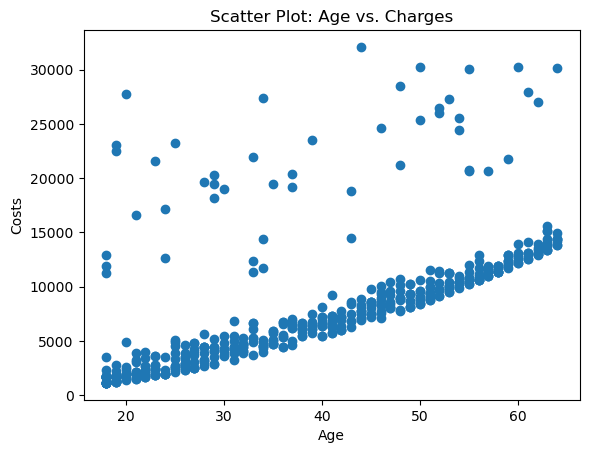

In [90]:
plt.scatter(filtered_df["age"],filtered_df["charges"])

plt.xlabel("Age")
plt.ylabel("Costs")
plt.title("Scatter Plot: Age vs. Charges")
plt.show()

We now want to confirm whether we can determine if the variables we aim to examine (number of children and region) are more or less evenly distributed by other factors (age and BMI), which we logically know increase the cost of insurance. To do this, we will calculate the median age and BMI for each category within the number of children and region columns and assess whether further examination is warranted. If the differences are too large, we won’t be certain whether these variables truly impact the final price or if the effect is actually driven by age and BMI. My presumption is that region may not be affected, while the number of children might be, since older individuals tend to have more children—but we’ll see!



In [91]:
region_mean_bmi = filtered_df.groupby("region")["bmi"].mean().reset_index()
print(region_mean_bmi)
region_mean_age=filtered_df.groupby("region")["age"].mean().reset_index()
print(region_mean_age)
children_mean_bmi=filtered_df.groupby("children")["bmi"].mean().reset_index()
print(children_mean_bmi)
children_mean_age=filtered_df.groupby("children")["age"].mean().reset_index()
print(children_mean_age)
region_median_bmi = filtered_df.groupby("region")["bmi"].median().reset_index()
print(region_median_bmi)
region_median_age=filtered_df.groupby("region")["age"].median().reset_index()
print(region_median_age)
children_median_bmi=filtered_df.groupby("children")["bmi"].median().reset_index()
print(children_median_bmi)
children_median_age=filtered_df.groupby("children")["age"].median().reset_index()
print(children_median_age)

      region        bmi
0  northeast  28.861760
1  northwest  28.930379
2  southeast  34.129552
3  southwest  31.019841
      region        age
0  northeast  39.216000
1  northwest  38.568182
2  southeast  38.261194
3  southwest  40.277778
   children        bmi
0         0  30.731099
1         1  30.928615
2         2  30.783580
3         3  30.768545
4         4  31.407727
5         5  28.792500
   children        age
0         0  39.116592
1         1  39.392308
2         2  37.920455
3         3  40.836364
4         4  38.454545
5         5  34.500000
      region      bmi
0  northeast  28.3100
1  northwest  29.1175
2  southeast  33.8250
3  southwest  30.5000
      region   age
0  northeast  40.0
1  northwest  38.0
2  southeast  38.5
3  southwest  42.0
   children      bmi
0         0  30.5900
1         1  30.1500
2         2  30.5425
3         3  30.8750
4         4  30.8750
5         5  27.1500
   children   age
0         0  39.0
1         1  40.0
2         2  39.0
3         3  4

These results are quite surprising to me. It seems that the number of children has little impact on both BMI and age. Even more surprisingly, fathers of five children tend to be younger.

Regarding regions, we see that the Northeast and Northwest have similar BMI levels. The Southwest has a significantly higher BMI compared to other regions, while the Southeast is also slightly elevated. 

As for age, the Southeast has the lowest average age. The Northwest (+0.3) and Northeast (+1) are quite close, while the Southwest is slightly further off (+2). 

I think that these results won't make the final conlusion invalid, but we must take them into account.

## Final Calculations
After this final calculation we will be able to determine where to live and how many kids we should have. 

In [92]:
region_mean_cost = filtered_df.groupby("region")["charges"].mean().reset_index()
print(region_mean_cost)
children_mean_cost=filtered_df.groupby("children")["charges"].mean().reset_index()
print(children_mean_cost)

      region      charges
0  northeast  8664.042222
1  northwest  8320.689321
2  southeast  7609.003587
3  southwest  7778.905534
   children       charges
0         0   7530.806677
1         1   7837.147396
2         2   9020.567024
3         3   9025.530139
4         4  10305.014255
5         5   7931.658310


Just by these averages we can see that on average the best option for male non smokers is the southeast region. 
If we look at the averages by number of child it is obvious that having 0 kids is the best option in order to minimize the costs.

## Graphical components
I did also boxplot visualisations of cost by kids and also by region.

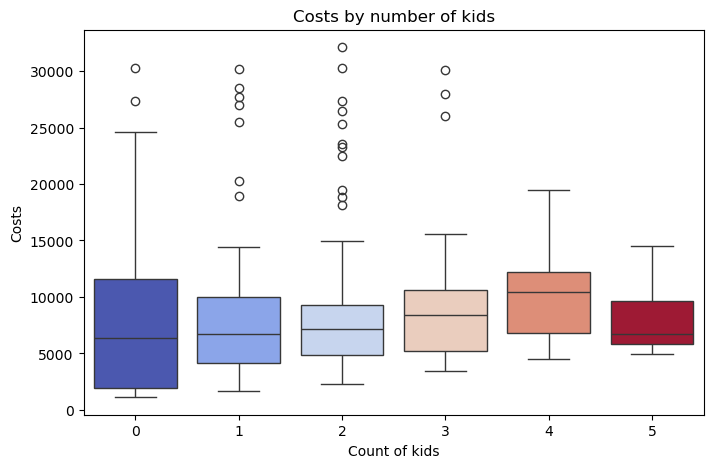

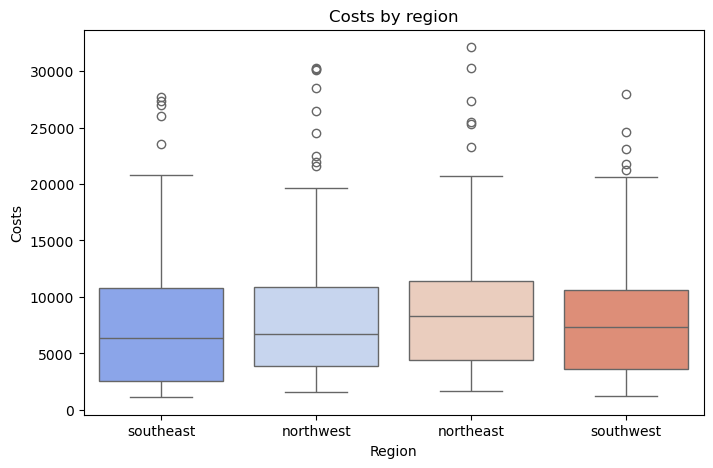

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="children", y="charges", data=filtered_df,hue="children", palette="coolwarm",legend=False)

plt.xlabel("Count of kids")
plt.ylabel("Costs")
plt.title("Costs by number of kids")
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x="region", y="charges", data=filtered_df,hue="region", palette="coolwarm",legend=False)

plt.xlabel("Region")
plt.ylabel("Costs")
plt.title("Costs by region")
plt.show()

## Conclsion
This supports our previous calculations, but we can see that there are many outliers in each region and in number of kids as well (mostly 1,2) In the future we should be able to tackle the problem!





This peace of code would determine whitch region would be the best for me in my current situation(21y, 0 kids), but the saple size is too small. So I excluded it from the main code.

In [94]:
currently_best_df = filtered_df[(filtered_df["age"]>=19)&(filtered_df["age"]<=23)&(filtered_df["children"]==0)]
region_current_mean_cost = currently_best_df.groupby("region")["charges"].mean().reset_index()
print(region_current_mean_cost)
region_current_count = currently_best_df.groupby("region")["charges"].count().reset_index()
print(region_current_count)

      region      charges
0  northeast  2181.844181
1  northwest  2913.385044
2  southeast  3137.722061
3  southwest  3030.349256
      region  charges
0  northeast        8
1  northwest       17
2  southeast       10
3  southwest       13


## Evaluating Cost-BMI relationship:
### Steps Brainstorm:
 - What is the average cost of insurance. the ave bmi?
### Approach Breakdown
 - Add column that divides bmi into medical catagories: obese, etc
 - Find Mean and Medium Insurance cost within each bmi catagory
 - Loop through each peron in each bmi catagory, and find the mean and median cost paid by people of same/similar age, sex, region, children, smoking status (everything but bmi) and compare that to the mean and median cost at this bmi catagory. record the difference to see if there are any trends where people in a certain bmi catagory typically pay more or less than other of their same age,sec etc.
 

### 1. Aggregate BMI catagories
Add column with bmi catagories (source: [cdc.gov](https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html))
- Underweight: Less than 18.5
- Healthy Weight: 18.5 to less than 25
- Overweight: 25 to less than 30
- Obesity: 30 or greater
    - Class 1 Obesity: 30 to less than 35
    - Class 2 Obesity: 35 to less than 40
    - Class 3 (Severe) Obesity: 40 or greater

*These catagories have been prefixed with letters to easily sort them in the dataframes by lowest to highest bmi*

In [95]:
#function to sort into bmi catagory
def bmi_catagory_sorter(bmi):
    if bmi >= 40:
        return 'f_class_3_obese'
    elif  bmi >= 35:
        return 'e_class_2_obese'
    elif  bmi >= 30:
        return 'd_class_1_obese'
    elif  bmi >= 25:
        return 'c_overweight'
    elif  bmi >= 18.5:
        return 'b_healthy_weight'
    elif  bmi < 18.5:
        return 'a_underweight'
    else:
        return 'err: input should be a number'

#Add columns with Adult BMI Category
bmi_analysis_df = starting_df
bmi_analysis_df['bmi_catagory'] = starting_df.bmi.apply(bmi_catagory_sorter)
print('Sample of df with new column added with bmi catagories:')
print(bmi_analysis_df.head())

aggregate_by_bmi_catagory = bmi_analysis_df.groupby('bmi_catagory').agg({'charges':['mean','count']})
print('\n Grouping data by bmi catagory here are the average insurance costs and counts of each catagory:')
print(aggregate_by_bmi_catagory)

Sample of df with new column added with bmi catagories:
   age     sex     bmi  children smoker     region      charges      bmi_catagory
0   19  female  27.900         0    yes  southwest  16884.92400      c_overweight
1   18    male  33.770         1     no  southeast   1725.55230   d_class_1_obese
2   28    male  33.000         3     no  southeast   4449.46200   d_class_1_obese
3   33    male  22.705         0     no  northwest  21984.47061  b_healthy_weight
4   32    male  28.880         0     no  northwest   3866.85520      c_overweight

 Grouping data by bmi catagory here are the average insurance costs and counts of each catagory:
                       charges      
                          mean count
bmi_catagory                        
a_underweight      8852.200585    20
b_healthy_weight  10409.337709   225
c_overweight      10987.509891   386
d_class_1_obese   14419.674970   391
e_class_2_obese   17022.258883   225
f_class_3_obese   16784.615546    91


### 2. Compare individuals insurance cost to the average cost of similar people
Defining **similar people**
 - age is +/- 2 years
 - sex, region, number of children, and smoking status are all the same
 - bmi is the the variable. We are checking similar people across all  bmi values

Using this definition of **similar people** we calculate the average cost of insurance and compare it to each individual's cost with this formula:
    
### 100*$\frac{*indidualCost* - *avgCost*}{*avgCost*}$
We also record the sample size of **similar people**. With these two new columns we now group by BMI Catagory again identify and coorilation between
BMI Catagroy and people paying more or less then the average cost of similar people across all BMI values.

In [ ]:
#Define Functions
#This function gets the count and average of insurance cost of each patiene with the imput age +/- 2 years, sex, children, smoker, region
# - Essentially the average cost of a simlar people across all bmis and count to record the sample size
def get_avg_with_bmi_variable(i_age,i_sex,i_children,i_smoker,i_region):
    return bmi_analysis_df[((bmi_analysis_df.age <= i_age + 2) & (bmi_analysis_df.age >= i_age - 2) )
                            & (bmi_analysis_df.sex == i_sex)
                            & (bmi_analysis_df.children == i_children) 
                            & (bmi_analysis_df.smoker == i_smoker) 
                            & (bmi_analysis_df.region == i_region)].agg({'charges': ['mean', 'count']})

#This function will run on all rows of bmi_analysis_df grouped by bmi_category 
# finding the difference between that individual's charges and the average charge of similar people calculated by the previous function
# it returns: [percent diffence in cost from the avg, sample size of average]
def get_percent_dif_from_avg(row):
    #Pull data from row
    i_charges = row['charges']
    i_age = row['age']
    i_sex = row['sex']
    i_children = row['children']
    i_smoker = row['smoker']
    i_region = row['region']
    #Use data to find all people of similar age and same: sex, number of children, smoker status and region
    # Then get the count and average insurance cost of these people 
    avg_cost_of_similar_people = get_avg_with_bmi_variable(i_age,i_sex,i_children,i_smoker,i_region).iloc[0].charges
    similar_people_smpl_size = int(get_avg_with_bmi_variable(i_age,i_sex,i_children,i_smoker,i_region).iloc[1].charges)
    #Calculate the percent difference this person pays to insurce compared to the average of similar people
    percent_diff_from_avg = round(100*((i_charges - avg_cost_of_similar_people)/avg_cost_of_similar_people),2)
    return [percent_diff_from_avg,similar_people_smpl_size]

In [97]:
#Create two new columns: 
# - perenct difference in cost each person compared to the average cost of similar people
# - sample size of similar people average
bmi_analysis_df[['percent_cost_diff_from_similar_ppl_avg','similar_ppl_smpl_size']] = bmi_analysis_df.apply(get_percent_dif_from_avg,axis=1,result_type='expand')
# Print sample of df with new columns
print(bmi_analysis_df.head())


   age     sex     bmi  children smoker     region      charges      bmi_catagory  percent_cost_diff_from_similar_ppl_avg  similar_ppl_smpl_size
0   19  female  27.900         0    yes  southwest  16884.92400      c_overweight                                   -0.64                    4.0
1   18    male  33.770         1     no  southeast   1725.55230   d_class_1_obese                                  -71.50                    6.0
2   28    male  33.000         3     no  southeast   4449.46200   d_class_1_obese                                   -4.18                    2.0
3   33    male  22.705         0     no  northwest  21984.47061  b_healthy_weight                                  118.59                    3.0
4   32    male  28.880         0     no  northwest   3866.85520      c_overweight                                  -61.55                    3.0


In [98]:
#Group df by bmi_catagory and calculate average percent_cost_diff_from_similar_ppl and average similar people sample size
percent_cost_diff_by_bmi_catagory = bmi_analysis_df.groupby('bmi_catagory').agg({'percent_cost_diff_from_similar_ppl_avg':'mean', 'similar_ppl_smpl_size':'mean'})
#cost_diff_by_bmi_catagory = bmi_analysis_df.groupby('bmi_catagory').cost_diff_from_avg.mean()

print('Step 2. Results: Grouped by BMI Catagory \n - Percent difference in insurance cost from average cost of similar people\n - Similar people sample size\n')
print(percent_cost_diff_by_bmi_catagory)

print('\n\nStep 1. Results: Grouped by BMI Catagory\n - Average Insurance cost\n - Number of people\n')
print(aggregate_by_bmi_catagory)

Step 2. Results: Grouped by BMI Catagory 
 - Percent difference in insurance cost from average cost of similar people
 - Similar people sample size

                  percent_cost_diff_from_similar_ppl_avg  similar_ppl_smpl_size
bmi_catagory                                                                   
a_underweight                                  -9.049000               5.100000
b_healthy_weight                               -4.379911               4.697778
c_overweight                                   -2.984223               4.857513
d_class_1_obese                                 2.679591               4.659847
e_class_2_obese                                 4.346533               4.591111
f_class_3_obese                                 4.012967               4.890110


Step 1. Results: Grouped by BMI Catagory
 - Average Insurance cost
 - Number of people

                       charges      
                          mean count
bmi_catagory                        
a_underwei

## Reflections on BMI Analysis:
### Coorilations
In both Step 1. and 2. of this analysis we find **positive coorilation between BMI and Insurance costs**. Across 5 of the 6 catagories with see the trend of increased insurance charges with increased BMI

The Class 2 Obesity to Class 3 Obesity Exception:
The one exeption is the trend from Class 2 Obesity to Class 3 Obesity. In this catagory we see a decrease in both average insurance cost (Step 1) and average percent cost difference of simlar people (Step 2). 

In Step 1, the sample size is considarably lower for Class 3 Obsity than all but the Underweight catagory. In addition the Average Cost is only slightly lower than teh Average Cost of Class 2 Obesity. 
These two facts combine would seem to accound for the lapse in positive corrilation.

In Step 2 however the average sample size is similar across all bmi catagories and the drop in Cost Percent Difference from Class 2 to Class 3 is quite dramatic. Therefore it could be warrented to further explore
this sample to identify any other trends across the Class 2 and Class 3 Catagories that might contribute to this outlier in the positive coorilation.

### Implications
BMI is a Weight/Height ratio that was created with a goal of assessing the fat to body mass propotions. This goal is made clear by the names of the catagories given to different level of BMI. Each name clearly implies that fat levels and health of related to a person BMI. However BMI does not factor in, muscle mass, bone mass, or body proportion. Without accounting for these factors BMI should not be used  to assess a person's fat levels or health with an acceptable level of accuratcy.

Therefore the positive coorilation between BMI and Insurance Cost is potentially concerning and cause for futher investigation. It would be poor practice if insurance companies are using BMI as a meteric for calculating there charges or citing BMI levels are a reason for charging people more or less other of similar people. 

### Potential Bias
Sample Bias:
 - This data set has a slighly dispaportional quanity of people who are 18 years old and people with 0 children 
 - There is no date information on these entries. As usefullness and accuracy of BMI as a metric of health an body fat proprotion comes under more review, the standards for accepted uses for BMI are certainly subject to change. Therefore the date of this data collect would be very pertanant to interpreting these results. 

 Confirmation Bias:
 - While analysis was done to find the coorilation of BMI to insurance cost, the coorialtion of other factors to insurance cost was not investigated. There might exister stronger coorilation and trends in this data set that would outweight or happen to impact the coorilation between BMI and Insurance Charges.
 
### Future Analysis
Run analysis on other data sets, particulary set that include date information that would allow the results to be more effectively interpreted.

Develope a two cost prediction models that take all the same inputs exepct one considers BMI and the other does not. Then calculate the accuraty of the the models and see if the inclusion of BMI consistantly produces more accuate results.

In this analysis we found a positive coorilation between BMI and Insurance cost and found that the lowest BMI catagory had the lowest average insurance cost and consitantly paid lower than the average insurance cost of similar people. However the implict bias in the name of the lowest BMI catagory, Underweight, would imply that it would be healthier for a person to have a slighly higher BMI. Therefore if BMI is in fact being used to calculate insurance costs, what would be the reason to charge low BMI patients more? Are insurance companies truely trying to measure a patience health when calculating prices or are they charging people based on size? This dataset only contained very few people in the Underweight catagory but these questions would be worth considering if investigating BMI and Cost trends with another data set.